In [84]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [85]:
ticker = 'AAPL'
data = yf.download(ticker)

[*********************100%***********************]  1 of 1 completed


In [86]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1980-12-15,0.093575,0.094005,0.093575,0.094005,175884800
1980-12-16,0.086707,0.087136,0.086707,0.087136,105728000
1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600


In [87]:
columns = ['Close', 'High', 'Low', 'Open','Volume']
data.columns = columns
data

,Close,High,Low,Open,Volume
Date,,,,,
1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1980-12-15,0.093575,0.094005,0.093575,0.094005,175884800
1980-12-16,0.086707,0.087136,0.086707,0.087136,105728000
1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600
...,...,...,...,...,...
2025-03-03,238.029999,244.029999,236.110001,241.789993,47184000
2025-03-04,235.929993,240.070007,234.679993,237.710007,53798100
2025-03-05,235.740005,236.550003,229.229996,235.419998,47227600


In [88]:
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()
data.dropna(inplace=True)

In [89]:
X = data[['Close', 'MA_10', 'MA_50']]
y = data['Close'].shift(-1).dropna()
X = X[:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [90]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.9996700840049532


Text(0, 0.5, 'Predicted Price')

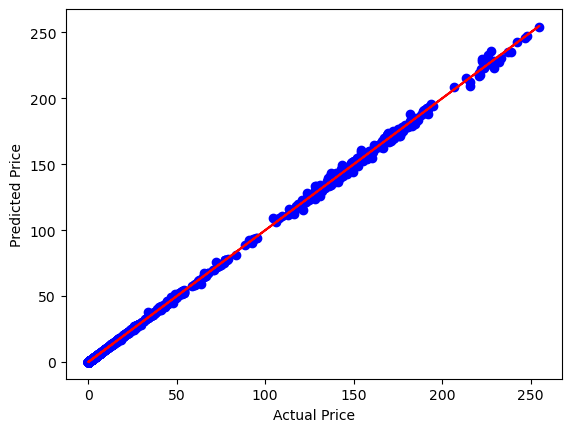

In [91]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [92]:
init_balance = 10000
balance = init_balance
position = 0

for i in range (len(X_test)):
    current = X_test.iloc[i]["Close"]
    prediction = y_pred[i]
    if prediction > current and current < balance:
        shares = balance//current
        if shares>0:
            balance = balance - shares*current
            position = position + shares
            print(f"Buying {shares} shares at {current}")
    elif prediction < current and position>0:
        balance = balance + position*current
        print(f"Selling {position} shares at {current}")
        position = 0
final = balance + (position*X_test.iloc[-1]["Close"])
print(f"Profit: {final-init_balance}")

Buying 790.0 shares at 12.651654243469238
Buying 24.0 shares at 0.20818302035331726
Selling 814.0 shares at 77.40760040283203
Buying 197494.0 shares at 0.31904736161231995
Selling 197494.0 shares at 47.6380500793457
Buying 234720.0 shares at 40.08270263671875
Buying 166.0 shares at 0.1030188798904419
Selling 234886.0 shares at 25.499113082885742
Buying 40095897.0 shares at 0.1493764966726303
Buying 1.0 shares at 0.06825000792741776
Selling 40095898.0 shares at 9.185771942138672
Buying 8739318.0 shares at 42.144222259521484
Selling 8739318.0 shares at 49.623870849609375
Buying 2233811.0 shares at 194.14300537109375
Buying 335.0 shares at 0.06395707279443741
Selling 2234146.0 shares at 25.357051849365234
Buying 4309529.0 shares at 13.145601272583008
Buying 17.0 shares at 0.33859190344810486
Buying 4.0 shares at 0.06867924332618713
Buying 1.0 shares at 0.05107984319329262
Selling 4309551.0 shares at 155.06854248046875
Buying 1806131709.0 shares at 0.37000390887260437
Selling 1806131709.0 